# Relatorio de Analise VII

## Criando Agrupamentos

In [20]:
import pandas as pd

In [21]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep =';')

In [22]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,17.14,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,29.33,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,15.38,Apartamento
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN,33.33,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


In [23]:
dados['Valor'].mean()

4985.730140445705

In [24]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [25]:
grupo_bairro = dados.groupby('Bairro')

In [26]:
type(grupo_bairro)

pandas.core.groupby.groupby.DataFrameGroupBy

In [27]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    6,    16,    18,    23,    32,    34,    37,    44,    45,
                58,
             ...
             22523, 22525, 22528, 22536, 22554, 22555, 22565, 22566, 22567,
             22574],
            dtype='int64', length=3922),
 'Botafogo': Int64Index([   25,    50,    91,    92,   115,   124,   132,   140,   206,
               210,
             ...
             22217, 22233, 22246, 22277, 22406, 22413, 22419, 22468, 22500,
             22544],
            dtype='int64', length=890),
 'Copacabana': Int64Index([    0,    11,    12,    13,    26,    27,    30,    33,    90,
                95,
             ...
             22460, 22466, 22490, 22497, 22534, 22537, 22549, 22563, 22564,
             22569],
            dtype='int64', length=2760),
 'Flamengo': Int64Index([   81,   144,   228,   295,   332,   358,   367,   372,   380,
               404,
             ...
             22308, 22331, 22381, 22403, 22433, 22457, 22482, 22485, 22494,
  

In [28]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7073.721754654425
Botafogo -> 8690.962879640045
Copacabana -> 4137.4135556361
Flamengo -> 4148.489626556016
Ipanema -> 9375.905
Leblon -> 8757.75411119812
Tijuca -> 2042.1940700808625


In [29]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7073.721755
Botafogo           8690.962880
Copacabana         4137.413556
Flamengo           4148.489627
Ipanema            9375.905000
Leblon             8757.754111
Tijuca             2042.194070
Name: Valor, dtype: float64

In [30]:
grupo_bairro['Valor', 'Condominio'].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7073.72,3626.94
Botafogo,8690.96,999.19
Copacabana,4137.41,1153.37
Flamengo,4148.49,1105.25
Ipanema,9375.91,2249.54
Leblon,8757.75,2110.54
Tijuca,2042.19,726.21


In [32]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [37]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Minimo', 'max': 'Maximo'})

,Minimo,Maximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5,1,'Valor Medio do Aluguel Por Bairro')

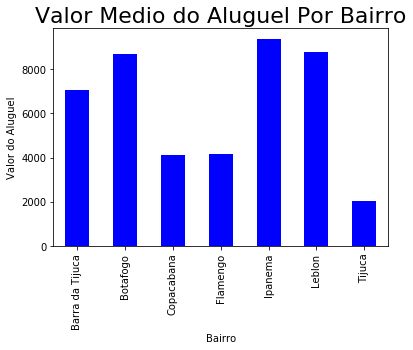

In [40]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do Aluguel Por Bairro', {'fontsize' : 22})